In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.700 6..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


## Distance matrix

In [2]:
from blocksnet.relations import calculate_distance_matrix

distance_matrix = calculate_distance_matrix(blocks_gdf)

In [3]:
distance_matrix

id,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
id,,,,,,,,,,,,,,,,,,,,,
0,0,2419,719,1602,3463,3138,2777,2505,20759,20905,...,24253,34340,27143,35702,37410,36365,66461,65543,66176,20769
1,2419,0,2829,824,2438,3625,2848,2071,23178,23323,...,26578,36700,29335,38078,39774,38736,68806,67894,68523,20951
2,719,2829,0,2069,3329,2607,2402,2338,20420,20557,...,24123,34161,27128,35252,36945,35908,65978,65064,65694,20131
3,1602,824,2069,0,2671,3359,2670,2002,22361,22507,...,25764,35880,28550,37290,38992,37950,68033,67118,67749,20948
4,3463,2438,3329,2671,0,2040,1336,991,23307,23423,...,27360,37331,30444,37753,39383,38382,68302,67408,68025,18543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,36365,38736,35908,37950,38382,36383,37048,37624,16440,16196,...,19036,15362,22400,793,1179,0,30176,29233,29882,37664
16316,66461,68806,65978,68033,68302,66277,66978,67593,46511,46285,...,47408,39313,49086,30883,29088,30176,0,1062,334,64157
16317,65543,67894,65064,67118,67408,65386,66083,66694,45543,45319,...,46381,38257,48037,29934,28153,29233,1062,0,729,63454


## Usage example

In [4]:
from blocksnet.analysis.network import median_accessibility

med_dist_df = median_accessibility(distance_matrix)

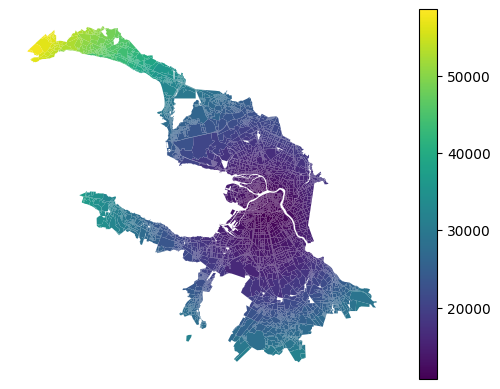

In [5]:
blocks_gdf.join(med_dist_df).plot('median_accessibility', legend=True).set_axis_off()